## Danting Yang SI618 Homework2 10713088

Q1. [5 points] Describe the dataset. 

1. 1. Load the data.

In [2]:
import pandas as pd
import numpy as np
invoices = pd.read_json('invoices.json')
items = pd.read_json('items.json')
purchases = pd.read_json('purchases.json')

2. How many total invoices were shipped?

In [3]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [4]:
invoices[~invoices.InvoiceNo.str.get(0).isin(['c'])].count()

InvoiceNo      25943
InvoiceDate    25943
CustomerID     22221
Country        25943
dtype: int64

There are 25943 invoices shipped. 

3. How many unique customers are there (regardless of shipped or not)?

In [5]:
len(invoices.CustomerID.unique())

4373

There are 4373 unique customers.

4. What the total number of unique items?

In [6]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [7]:
len(items.StockCode.unique())

4070

There are 4070 unique items.

5. Are there any columns with null values?

In [8]:
null_columns=items.columns[items.isnull().any()]
items[null_columns].isnull().sum()

Description    176
dtype: int64

In [9]:
null_columns=invoices.columns[invoices.isnull().any()]
invoices[null_columns].isnull().sum()

CustomerID    3722
dtype: int64

In [10]:
null_columns=purchases.columns[purchases.isnull().any()]
purchases[null_columns].isnull().sum()

Series([], dtype: float64)

Yes, columns with null values are listed above.

6. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [11]:
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [12]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [13]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


I will join invoices table and purchases table together according to InvoiceNo using left join or right join. Because I just to keep one colunm for InvoiceNo. I will combine items table to the table we just merged according to Stockcode. I will let items table to match the newly merged table 

Q2. [10 points] Invoice Analysis 

1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.

In [14]:
invoices.groupby(['CustomerID'])['InvoiceNo'].count().nlargest(10)

CustomerID
14911.0    249
12748.0    225
17841.0    169
14606.0    130
13089.0    118
15311.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64

2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.

In [15]:
purchases.shape

(541909, 3)

In [16]:
items.shape

(4070, 3)

In [17]:
pi = purchases.merge(invoices,on='InvoiceNo',how='left')
pi.shape

(545256, 6)

In [18]:
pi.groupby(['CustomerID'])['Quantity'].count().nlargest(10)

CustomerID
17841.0    7983
14911.0    5942
14096.0    5128
12748.0    4731
14606.0    2840
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: Quantity, dtype: int64

3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

I think it appears that the more invoices a customer have, the greater the total quantity of items. The two rankings are not exactly the same, but they are similar. There are 7 same customers in the two rankings. Besides, customers who rank top in the invoices number are also likely to have more quantities of items.

Q3. [10 points] Item Analysis 

1. What is the average item-unit price?

In [19]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [20]:
items.UnitPrice.mean()

6.905277886977952

2. What % of items are under $20?

In [21]:
items[items['UnitPrice'] < 20]['UnitPrice'].count()/items['UnitPrice'].count()*100

98.37837837837839

3. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis

In [24]:
print(items.min())

StockCode    10002
UnitPrice        0
dtype: object


In [25]:
print(items.max())

StockCode          m
UnitPrice    11062.1
dtype: object


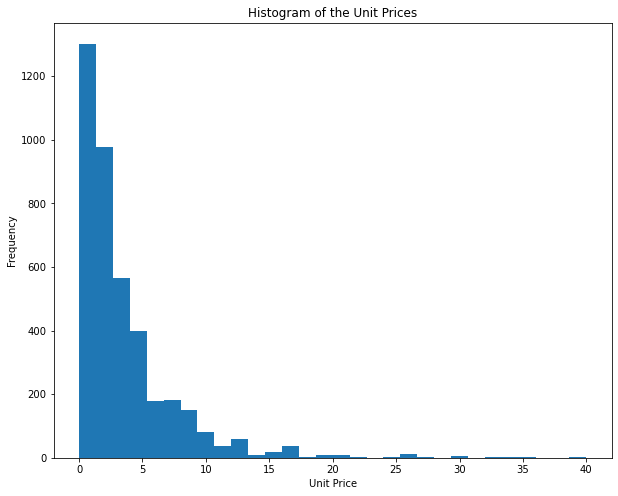

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
data = items.UnitPrice
plt.hist(data, bins=30, range=(0, 40))
plt.ylabel('Frequency')
plt.xlabel('Unit Price')
plt.title("Histogram of the Unit Prices");
plt.show()

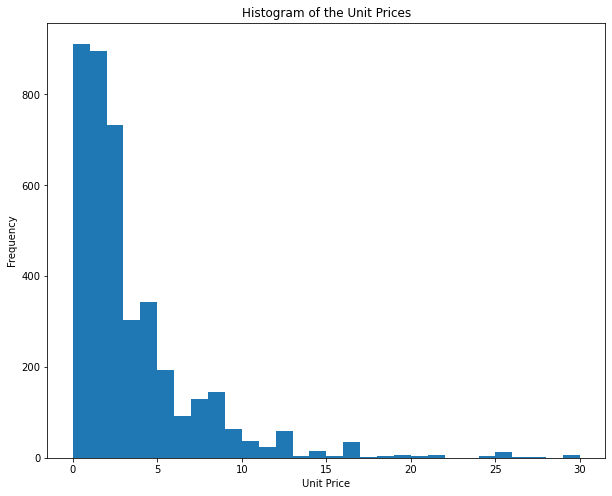

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
data = items.UnitPrice
plt.hist(data, bins=30, range=(0, 30))
plt.ylabel('Frequency')
plt.xlabel('Unit Price')
plt.title("Histogram of the Unit Prices");
plt.show()

Q4. [25 points] Order Trends 

1. What are the top 10 most ordered items (Quantity) in descending order? 

In [33]:
pi.head()

,InvoiceNo,StockCodeSC,Quantity,InvoiceDate,CustomerID,Country
0,536365,SC85123A,6,12/1/10 8:26,17850.0,United Kingdom
1,536365,SC71053,6,12/1/10 8:26,17850.0,United Kingdom
2,536365,SC84406B,8,12/1/10 8:26,17850.0,United Kingdom
3,536365,SC84029G,6,12/1/10 8:26,17850.0,United Kingdom
4,536365,SC84029E,6,12/1/10 8:26,17850.0,United Kingdom


In [44]:
SortPi = pi.sort_values(by="Quantity" , ascending=False)
SortPi['StockCodeSC'].head(10)

543768     SC23843
61688      SC23166
505469     SC84826
75089      SC37413
424468     SC84077
208284     SC22197
223006    SC85123A
98415      SC22053
273097     SC18007
52780      SC21108
Name: StockCodeSC, dtype: object

In [46]:
pi.sort_values('Quantity', ascending=False)[['StockCodeSC']].head(10)

,StockCodeSC
543768,SC23843
61688,SC23166
505469,SC84826
75089,SC37413
424468,SC84077
208284,SC22197
223006,SC85123A
98415,SC22053
273097,SC18007
52780,SC21108
